In [66]:
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torch.utils.data import DataLoader
from models.cycleGAN import CycleGANModel
from data.custom_image_dataset import CustomImageDataset
from configs.option import Option

In [67]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [68]:

model_1 = CycleGANModel(device=device)
model_2 = CycleGANModel(device=device)

model_1.load_model("./checkpoints/training_6/iter_20000")
model_2.load_model("./checkpoints/training_6/iter_5000")

Creating cycleGAN on: cuda
Creating cycleGAN on: cuda


In [69]:
dataset = CustomImageDataset(
    img_dir="./datasets/summer2winter_yosemite",
    opt=Option(phase="test")
)

dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [70]:
data = next(iter(dataloader))

In [71]:
def showImage(paths, row=1, col=1):
    plt.subplots(row, col, figsize=(10,10))

    for i in range(row):
        for j in range(col):
            pos = col * i + j
            idx = pos % len(paths)
            path, name = paths[idx]
            
            plt.subplot(row, col, pos+1)
            plt.imshow(mpimg.imread(path))
            plt.title(name, color="white")
            plt.axis('off')


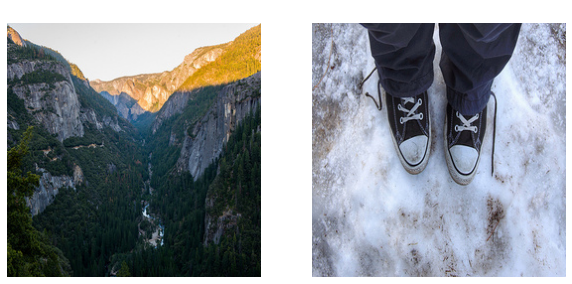

In [72]:
showImage([(data["path_A"][0], "Image X"), (data["path_B"][0], "Image Y")], row=1, col=2)

In [73]:
paths = model_1.test(data['img_A'], data['img_B'], save_dir="./results/test_1")

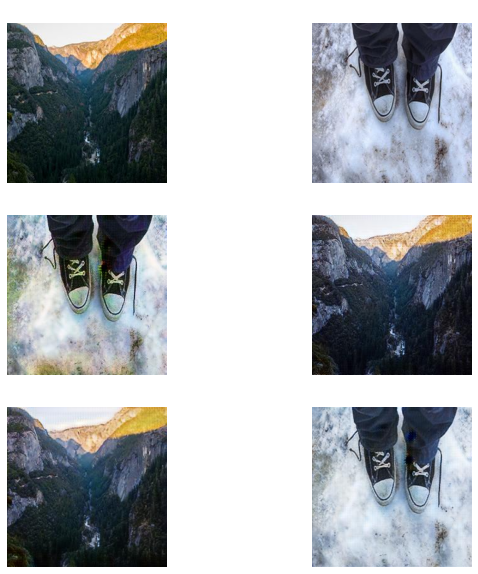

In [74]:
showImage(paths, 3, 2)

In [75]:
paths = model_2.test(data['img_A'], data['img_B'], save_dir="./results/test_2")

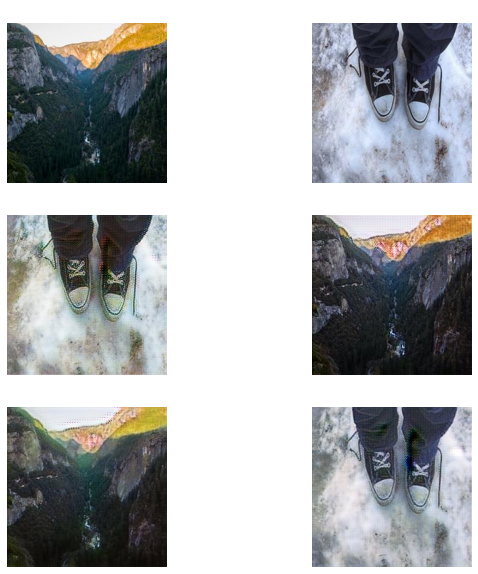

In [76]:
showImage(paths, 3, 2)

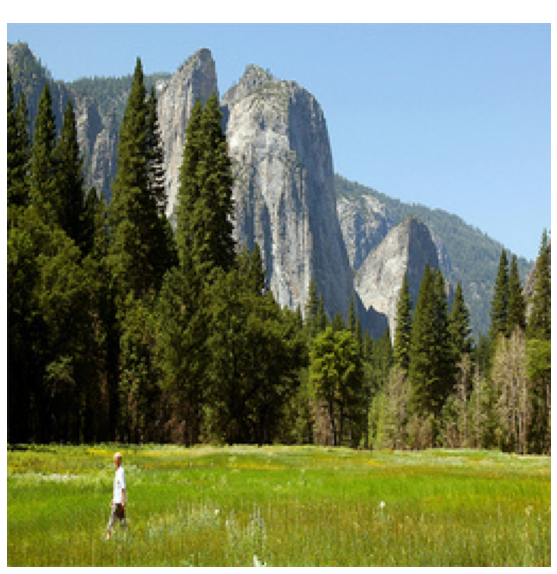

In [77]:
from PIL import Image
import torchvision.transforms as transforms

sample_image_path = "./datasets/summer2winter_yosemite/trainA/2009-12-06 06_58_39.jpg"

img = Image.open(sample_image_path).convert("RGB")

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                                ])

tensor_img = transform(img)

showImage([(sample_image_path, "Image")])

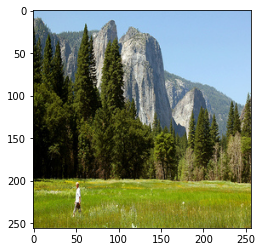

In [78]:
inverse_transform = transforms.Compose([transforms.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                        transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ], std = [ 1., 1., 1. ]),
                                        transforms.ToPILImage()
                                    ])

img_PIL = inverse_transform(tensor_img)

plt.imshow(img_PIL)